In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [2]:
dados = pd.read_csv('ex1data1.txt')

In [3]:
dados

,profit,population
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [4]:
dados.shape


(97, 2)

In [5]:
dados.rename(columns={'profit': 'Lucro',
                      'population':'população'},
             inplace=True)

In [6]:
dados.head()

,Lucro,população
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
X = np.array(dados['Lucro'])

In [8]:
X.shape

(97,)

In [9]:
y = np.array(dados['população'])

In [10]:
y.shape

(97,)

Dividir o dataset em dados de treinamento e dados de teste

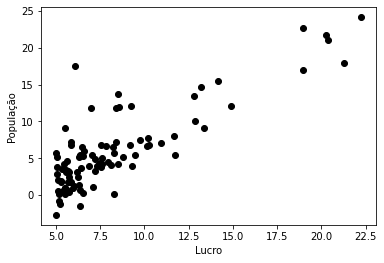

In [11]:
plt.scatter(X,y,color="black")
plt.xlabel('Lucro')
plt.ylabel('População')
plt.show()

In [12]:
# CRIAR UM MODELO DE TIPO DE REGRESSÃO LINEAR
modelo = linear_model.LinearRegression()
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [13]:
#TREINAR O MODELO USANDO O DATASET DE TESTE
#PARA ENCONTRAR O VALOR DE A E B(Y = A + B.X)
modelo.fit(X, y)

LinearRegression()

Exibir os coeficientes(A e B)

In [14]:
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)

(A) Intercepto:  [-3.89578088]
(B) Inclinação:  [[1.19303364]]


Exibir a nossa reta de regressão no dataset de treino

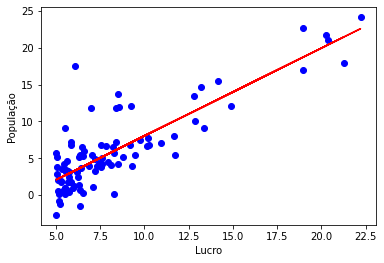

In [15]:
plt.scatter(X, y, color = "blue")
plt.plot(X, modelo.coef_[0][0]*X + modelo.intercept_[0], '-r')
plt.ylabel('População')
plt.xlabel('Lucro')
plt.show()

Executar o modelo no dataset de teste

In [16]:
#Primeiro fazer as predições usando o modelo e base de teste
predicoes_y = modelo.predict(X)

Exibir a nossa reta de regressão no dataset de teste

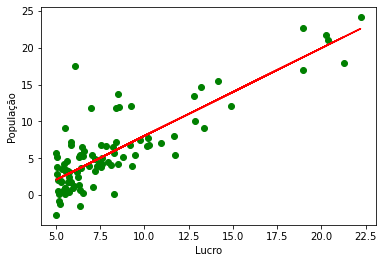

In [17]:
plt.scatter(X, y, color='green')
plt.plot(X, modelo.coef_[0][0]*X + modelo.intercept_[0], '-r')
plt.ylabel('População')
plt.xlabel('Lucro')
plt.show()

Avaliar o modelo

In [18]:
#Agora é mostrar as métricas
print(f'Soma dos Erros ao Quadrado (SSE): {np.sum((predicoes_y - y)**2):.2f}')
print(f'Erro Quadrático Médio (MSE): {mean_squared_error(y, predicoes_y):.2f}')
print(f'Erro Médio Absoluto (MAE): {mean_absolute_error(y, predicoes_y):.2f}')
print(f'Raiz do Erro Quadrático Médio (RMSE): {sqrt(mean_squared_error(y, predicoes_y)):.2f}')
print(f'R2-score: {r2_score(predicoes_y, y):.2f}')

Soma dos Erros ao Quadrado (SSE): 868.53
Erro Quadrático Médio (MSE): 8.95
Erro Médio Absoluto (MAE): 2.19
Raiz do Erro Quadrático Médio (RMSE): 2.99
R2-score: 0.58
